In [32]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt

# plotting
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

# scikit learn - sklearn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve
from xgboost import XGBRegressor
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score,roc_auc_score, roc_curve, RocCurveDisplay
from numpy import mean
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import jaccard_score
from sklearn.decomposition import PCA 
# radiografia de nulos
import missingno as msno

import os
os.chdir(os.path.abspath(os.curdir))
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [33]:
os.listdir("../dados")

['nba_stats.csv', 'steroid_doping.csv']

In [34]:
nba_inicio = pd.read_csv("../dados/nba_stats.csv")

In [35]:
nba_inicio[:3]

,year,name,playerId,playerSlug,positionId,teamId,status,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,rebounds,fouls,avgRebounds,avgPoints,avgFieldGoalsMade,avgFieldGoalsAttempted,fieldGoalPct,avgThreePointFieldGoalsMade,avgThreePointFieldGoalsAttempted,threePointFieldGoalPct,avgFreeThrowsMade,avgFreeThrowsAttempted,freeThrowPct,avgAssists,avgTurnovers,points,fieldGoalsMade,fieldGoalsAttempted,threePointFieldGoalsMade,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,position,birthdate,college,draftinfo,birthplace,team,htwt,experience,rankingSalary,salary
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,"$9,000,000"
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,"$10,125,000"
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,0.0,18.0,0.0,4.0,0.0,2979.0,273.0,147.0,3.845070,31.084507,10.732394,25.535212,42.029999,1.380282,4.309859,32.026145,8.239436,10.126760,81.362999,4.577465,3.338028,2207.0,762.0,1813.0,98.0,306.0,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,17,"$11,250,000"


In [36]:
nba_inicio.rename(columns={
    'year': 'ano',
    'name': 'nome',
    'playerId': 'id_jogador',
    'playerSlug': 'slug_jogador',
    'positionId': 'id_posicao',
    'teamId': 'id_time',
    'status': 'status',
    'gamesPlayed': 'jogos_jogados',
    'avgMinutes': 'media_minutos',
    'avgFouls': 'media_faltas',
    'flagrantFouls': 'faltas_graves',
    'technicalFouls': 'faltas_tecnicas',
    'ejections': 'expulsoes',
    'doubleDouble': 'double_double',
    'tripleDouble': 'triple_double',
    'minutes': 'minutos',
    'rebounds': 'rebotes',
    'fouls': 'faltas',
    'avgRebounds': 'media_rebotes',
    'avgPoints': 'media_pontos',
    'avgFieldGoalsMade': 'media_cestas',
    'avgFieldGoalsAttempted': 'media_tentativas_cestas',
    'fieldGoalPct': 'pct_cestas',
    'avgThreePointFieldGoalsMade': 'media_cestas_3pontos',
    'avgThreePointFieldGoalsAttempted': 'media_tentativas_3pontos',
    'threePointFieldGoalPct': 'pct_3pontos',
    'avgFreeThrowsMade': 'media_lances_livres',
    'avgFreeThrowsAttempted': 'media_tentativas_lances_livres',
    'freeThrowPct': 'pct_lances_livres',
    'avgAssists': 'media_assistencias',
    'avgTurnovers': 'media_erro_passes',
    'points': 'pontos',
    'fieldGoalsMade': 'cestas_feitas',
    'fieldGoalsAttempted': 'tentativas_cestas',
    'threePointFieldGoalsMade': 'cestas_3pontos_feitas',
    'threePointFieldGoalsAttempted': 'tentativas_3pontos',
    'freeThrowsMade': 'lances_livres_feitos',
    'freeThrowsAttempted': 'tentativas_lances_livres',
    'assists': 'assistencias',
    'turnovers': 'erro_passes',
    'avgSteals': 'media_roubos',
    'avgBlocks': 'media_tocos',
    'steals': 'roubos',
    'blocks': 'tocos',
    'position': 'posicao',
    'birthdate': 'data_nascimento',
    'college': 'faculdade',
    'draftinfo': 'informacoes_draft',
    'birthplace': 'local_nascimento',
    'team': 'time',
    'htwt': 'altura_peso',
    'experience': 'experiencia',
    'rankingSalary': 'ranking_salario',
    'salary': 'salario'
}, inplace=True)

## DataQuality, Cleasing and Transforming

### Conversao de peso e altura

In [37]:
import re
# Função para converter altura para metros
def convert_height_to_meters(height):
    if pd.notna(height):
        height = height.split(',')[0].strip()
        match = re.match(r"(\d+)' (\d+)\"", height)
        if match:
            feet = int(match.group(1))
            inches = int(match.group(2))
            height_meters = (feet * 0.3048) + (inches * 0.0254)
            return round(height_meters, 2)
        return 0
    #else:
    #    return 0

# Função para converter peso para kg
def convert_weight_to_kg(weight):
    if pd.notna(weight):
        weight = weight.split(',')[1].strip()
        match = re.match(r"(\d+) lbs", weight)
        if match:
            pounds = int(match.group(1))
            weight_kg = pounds * 0.453592
            return round(weight_kg, 2)
        return 0
    #else:
    #    return 0

In [38]:
nba_inicio['altura'] = nba_inicio['altura_peso'].apply(lambda x: convert_height_to_meters(x))
nba_inicio['peso'] = nba_inicio['altura_peso'].apply(lambda x: convert_weight_to_kg(x))

In [39]:
nba_inicio['data_nascimento_'] = list(map(lambda x: x.split(" ")[0], nba_inicio['data_nascimento']))

In [40]:
nba_inicio['data_nascimento_'] = pd.to_datetime(nba_inicio['data_nascimento_'], format="%m/%d/%Y")

In [41]:
def calcular_idade(nasc):
    hoje = datetime.now()
    idade = ((hoje - nasc).days) // 365
    return idade 

nba_inicio['idade'] = nba_inicio['data_nascimento_'].apply(calcular_idade)

In [42]:
nba_inicio['idade_na_temporada'] = nba_inicio['ano'] - nba_inicio['data_nascimento_'].dt.year
nba_inicio['idade_completa'] = ((pd.to_datetime(nba_inicio['ano'].astype(str) + '-01-01') - nba_inicio['data_nascimento_']).dt.days // 365.25).astype(int)
nba_inicio['idade_na_temporada'] = nba_inicio['idade_na_temporada'] - nba_inicio['idade_completa']

#### Tratamento Salario

In [43]:
nba_inicio['salario_'] = nba_inicio['salario'].str.replace("$", "").str.replace(",", "").astype("float64")

In [44]:
nba_inicio[:5]

,ano,nome,id_jogador,slug_jogador,id_posicao,id_time,status,jogos_jogados,media_minutos,media_faltas,faltas_graves,faltas_tecnicas,expulsoes,double_double,triple_double,minutos,rebotes,faltas,media_rebotes,media_pontos,media_cestas,media_tentativas_cestas,pct_cestas,media_cestas_3pontos,media_tentativas_3pontos,pct_3pontos,media_lances_livres,media_tentativas_lances_livres,pct_lances_livres,media_assistencias,media_erro_passes,pontos,cestas_feitas,tentativas_cestas,cestas_3pontos_feitas,tentativas_3pontos,lances_livres_feitos,tentativas_lances_livres,assistencias,erro_passes,media_roubos,media_tocos,roubos,tocos,posicao,data_nascimento,faculdade,informacoes_draft,local_nascimento,time,altura_peso,experiencia,ranking_salario,salario,altura,peso,data_nascimento_,idade,idade_na_temporada,idade_completa,salario_
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,"$9,000,000",NaN,NaN,1975-06-07,49,1,23,9000000.0
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,"$10,125,000",NaN,NaN,1975-06-07,49,1,24,10125000.0
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,0.0,18.0,0.0,4.0,0.0,2979.0,273.0,147.0,3.845070,31.084507,10.732394,25.535212,42.029999,1.380282,4.309859,32.026145,8.239436,10.126760,81.362999,4.577465,3.338028,2207.0,762.0,1813.0,98.0,306.0,585.0,719.0,325.0,237.0,2.507042,0.281690,178.0,20.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,17,"$11,250,000",NaN,NaN,1975-06-07,49,1,25,11250000.0
3,2002,Allen Iverson,366,allen-iverson,SG,PHI,inactive,60.0,43.700000,1.700000,0.0,12.0,1.0,4.0,1.0,2622.0,269.0,102.0,4.483333,31.383333,11.083333,27.816668,39.844002,1.300000,4.466667,29.104477,7.916666,9.750000,81.196999,5.516667,3.950000,1883.0,665.0,1669.0,78.0,268.0,475.0,585.0,331.0,237.0,2.800000,0.216667,168.0,13.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,14,"$12,375,000",NaN,NaN,1975-06-07,49,1,26,12375000.0
4,2003,Allen Iverson,366,allen-iverson,SG,PHI,inactive,82.0,42.500000,1.817073,0.0,8.0,0.0,6.0,0.0,3485.0,344.0,149.0,4.195122,27.585365,9.804878,23.658537,41.443001,1.024390,3.695122,27.722773,6.951220,8.975610,77.445999,5.536585,3.487805,2262.0,804.0,1940.0,84.0,303.0,570.0,736.0,454.0,286.0,2.743902,0.158537,225.0,13.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,11,"$13,500,000",NaN,NaN,1975-06-07,49,1,27,13500000.0


In [45]:
### EOF TRATAMENTO

# quais os jogadores mais superfaturados!?

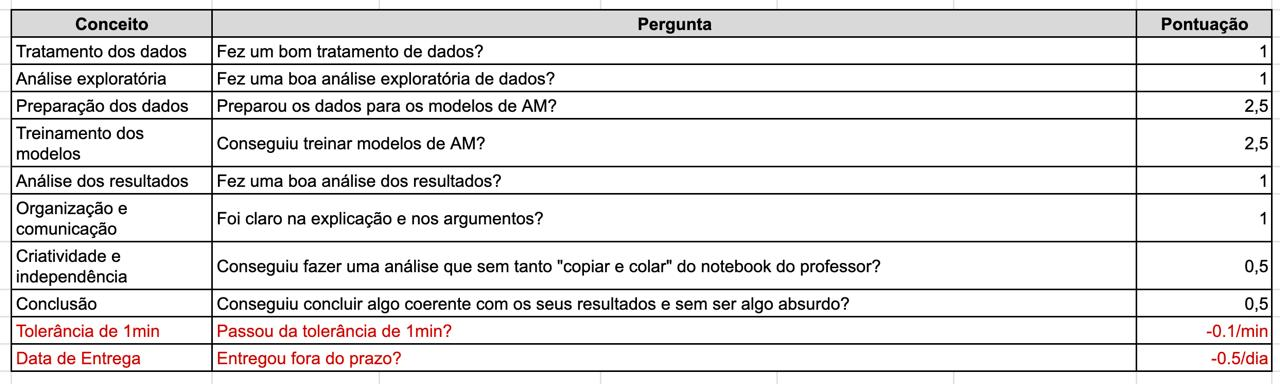

### Iniciando testes

In [46]:
# Quantidade de colunas (dimensionalidade alta)
len(nba_inicio.columns)

61

In [47]:
# Verificando as colunas e os valores que elas trazem
nba_inicio[:2]

,ano,nome,id_jogador,slug_jogador,id_posicao,id_time,status,jogos_jogados,media_minutos,media_faltas,faltas_graves,faltas_tecnicas,expulsoes,double_double,triple_double,minutos,rebotes,faltas,media_rebotes,media_pontos,media_cestas,media_tentativas_cestas,pct_cestas,media_cestas_3pontos,media_tentativas_3pontos,pct_3pontos,media_lances_livres,media_tentativas_lances_livres,pct_lances_livres,media_assistencias,media_erro_passes,pontos,cestas_feitas,tentativas_cestas,cestas_3pontos_feitas,tentativas_3pontos,lances_livres_feitos,tentativas_lances_livres,assistencias,erro_passes,media_roubos,media_tocos,roubos,tocos,posicao,data_nascimento,faculdade,informacoes_draft,local_nascimento,time,altura_peso,experiencia,ranking_salario,salario,altura,peso,data_nascimento_,idade,idade_na_temporada,idade_completa,salario_
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,0.0,5.0,0.0,4.0,0.0,1990.0,236.0,98.0,4.916666,26.750000,9.062500,22.000000,41.193001,1.208333,4.145834,29.145730,7.416666,9.875000,75.105003,4.645834,3.479167,1284.0,435.0,1056.0,58.0,199.0,356.0,474.0,223.0,167.0,2.291667,0.145833,110.0,7.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,"$9,000,000",NaN,NaN,1975-06-07,49,1,23,9000000.0
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,0.0,12.0,0.0,1.0,0.0,2853.0,267.0,162.0,3.814286,28.414286,10.414286,24.757143,42.066002,1.271429,3.728571,34.099618,6.314286,8.857142,71.290001,4.685714,3.285714,1989.0,729.0,1733.0,89.0,261.0,442.0,620.0,328.0,230.0,2.057143,0.071429,144.0,5.0,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,"$10,125,000",NaN,NaN,1975-06-07,49,1,24,10125000.0


#### Missing Detect and Treatment

<Axes: >

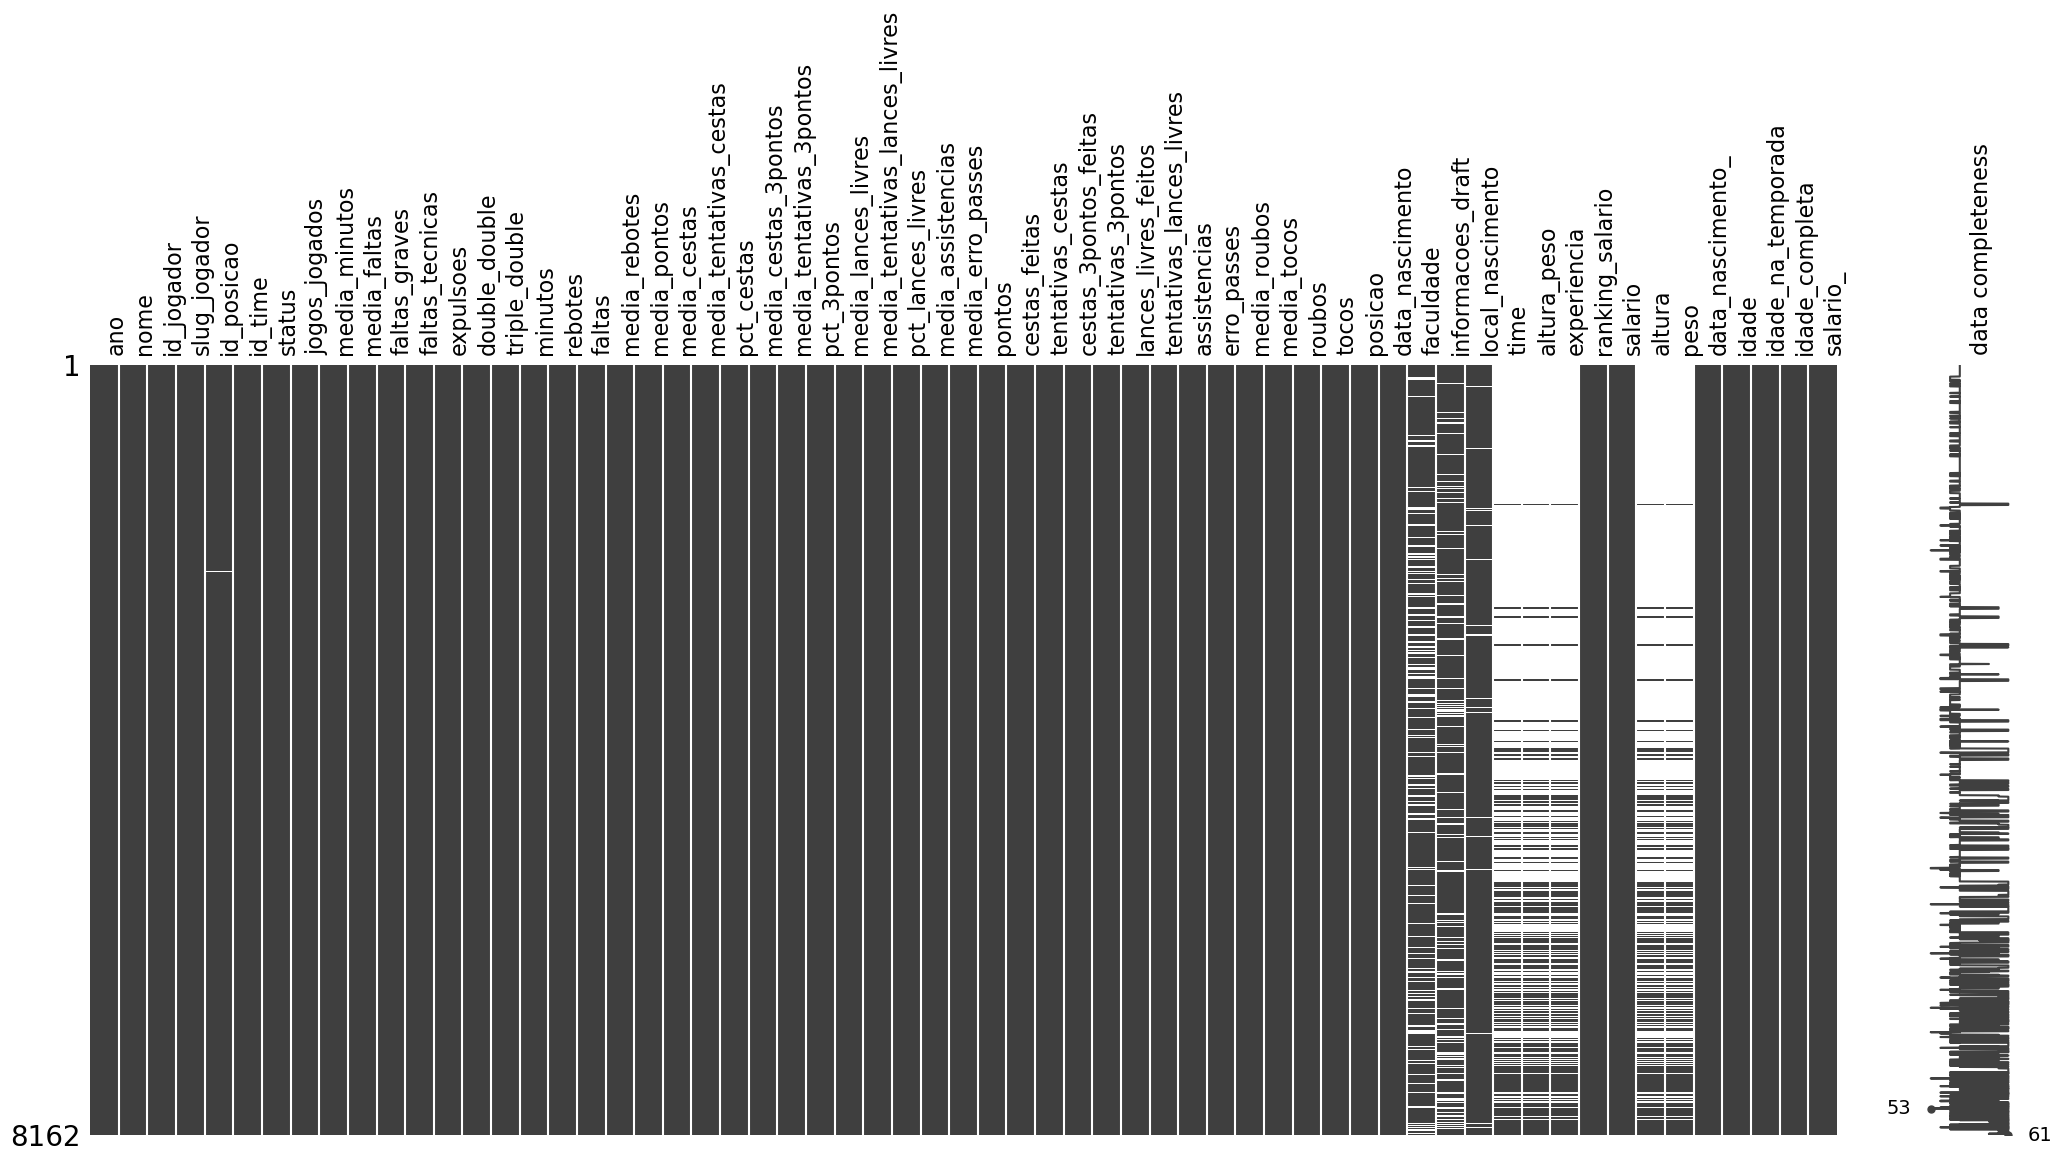

In [48]:
msno.matrix(nba_inicio,  labels=True, label_rotation=90)

#### DataType

In [49]:
nba = nba_inicio.copy()

In [50]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ano                             8162 non-null   int64         
 1   nome                            8162 non-null   object        
 2   id_jogador                      8162 non-null   int64         
 3   slug_jogador                    8162 non-null   object        
 4   id_posicao                      8156 non-null   object        
 5   id_time                         8162 non-null   object        
 6   status                          8162 non-null   object        
 7   jogos_jogados                   8162 non-null   float64       
 8   media_minutos                   8162 non-null   float64       
 9   media_faltas                    8162 non-null   float64       
 10  faltas_graves                   8162 non-null   float64       
 11  falt

In [51]:
#nba[nba['id_posicao'].isna()]['id_posicao'].fillna('C') # pivo
#nba['id_posicao'] = nba['id_posicao'].fillna('C')

In [437]:
nba[nba['nome'].str.contains("LeBron James")]

,ano,nome,id_jogador,slug_jogador,id_posicao,id_time,status,jogos_jogados,media_minutos,media_faltas,faltas_graves,faltas_tecnicas,expulsoes,double_double,triple_double,minutos,rebotes,faltas,media_rebotes,media_pontos,media_cestas,media_tentativas_cestas,pct_cestas,media_cestas_3pontos,media_tentativas_3pontos,pct_3pontos,media_lances_livres,media_tentativas_lances_livres,pct_lances_livres,media_assistencias,media_erro_passes,pontos,cestas_feitas,tentativas_cestas,cestas_3pontos_feitas,tentativas_3pontos,lances_livres_feitos,tentativas_lances_livres,assistencias,erro_passes,media_roubos,media_tocos,roubos,tocos,posicao,data_nascimento,faculdade,informacoes_draft,local_nascimento,time,altura_peso,experiencia,ranking_salario,salario,altura,peso,data_nascimento_,idade,idade_na_temporada,idade_completa,salario_
2567,2005,LeBron James,1966,lebron-james,SF,CLE,active,80.0,42.350000,1.825000,0.0,4.0,0.0,25.0,4.0,3388.0,588.0,146.0,7.350000,27.187500,9.937500,21.050000,47.209000,1.350000,3.850000,35.064936,5.962500,7.950000,75.000000,7.212500,3.275000,2175.0,795.0,1684.0,108.0,308.0,477.0,636.0,577.0,262.0,2.212500,0.650000,177.0,52.0,Small Forward,12/30/1984 (38),NaN,"2003: Rd 1, Pk 1 (CLE)","Akron, OH",Los Angeles Lakers,"6' 9"", 250 lbs",19th Season,137,"$4,621,800",2.06,113.4,1984-12-30,39,1,20,4621800.0
2568,2006,LeBron James,1966,lebron-james,SF,CLE,active,79.0,42.544304,2.291139,0.0,0.0,0.0,21.0,5.0,3361.0,556.0,181.0,7.037975,31.367088,11.075950,23.075949,47.998001,1.607595,4.797468,33.509234,7.607595,10.303798,73.833000,6.594937,3.291139,2478.0,875.0,1823.0,127.0,379.0,601.0,814.0,521.0,260.0,1.556962,0.835443,123.0,66.0,Small Forward,12/30/1984 (38),NaN,"2003: Rd 1, Pk 1 (CLE)","Akron, OH",Los Angeles Lakers,"6' 9"", 250 lbs",19th Season,106,"$5,828,089",2.06,113.4,1984-12-30,39,1,21,5828089.0
2569,2007,LeBron James,1966,lebron-james,SF,CLE,active,78.0,40.897434,2.192308,2.0,2.0,0.0,16.0,1.0,3190.0,526.0,171.0,6.743590,27.333334,9.897436,20.782051,47.625000,1.269231,3.974359,31.935483,6.269231,8.987180,69.757004,6.025641,3.205128,2132.0,772.0,1621.0,99.0,310.0,489.0,701.0,470.0,250.0,1.602564,0.705128,125.0,55.0,Small Forward,12/30/1984 (38),NaN,"2003: Rd 1, Pk 1 (CLE)","Akron, OH",Los Angeles Lakers,"6' 9"", 250 lbs",19th Season,33,"$13,041,250",2.06,113.4,1984-12-30,39,1,22,13041250.0
2570,2008,LeBron James,1966,lebron-james,SF,CLE,active,75.0,40.360000,2.200000,0.0,2.0,0.0,31.0,7.0,3027.0,592.0,165.0,7.893333,30.000000,10.586667,21.893333,48.355999,1.506667,4.786667,31.476322,7.320000,10.280000,71.206001,7.186667,3.400000,2250.0,794.0,1642.0,113.0,359.0,549.0,771.0,539.0,255.0,1.840000,1.080000,138.0,81.0,Small Forward,12/30/1984 (38),NaN,"2003: Rd 1, Pk 1 (CLE)","Akron, OH",Los Angeles Lakers,"6' 9"", 250 lbs",19th Season,29,"$14,410,581",2.06,113.4,1984-12-30,39,1,23,14410581.0
2571,2009,LeBron James,1966,lebron-james,SF,CLE,active,81.0,37.703705,1.716049,0.0,10.0,0.0,29.0,7.0,3054.0,613.0,139.0,7.567901,28.444445,9.740741,19.913580,48.915001,1.629630,4.740741,34.375000,7.333334,9.407408,77.953003,7.246913,2.975309,2304.0,789.0,1613.0,132.0,384.0,594.0,762.0,587.0,241.0,1.691358,1.148148,137.0,93.0,Small Forward,12/30/1984 (38),NaN,"2003: Rd 1, Pk 1 (CLE)","Akron, OH",Los Angeles Lakers,"6' 9"", 250 lbs",19th Season,23,"$15,779,912",2.06,113.4,1984-12-30,39,1,24,15779912.0
2572,2010,LeBron James,1966,lebron-james,SF,CLE,active,76.0,39.026318,1.565789,0.0,4.0,0.0,31.0,4.0,2966.0,554.0,119.0,7.289473,29.710526,10.105263,20.105263,50.262001,1.697368,5.092105,33.333334,7.802631,10.171053,76.713997,8.565789,3.434210,2258.0,768.0,1528.0,129.0,387.0,593.0,773.0,651.0,261.0,1.644737,1.013158,125.0,77.0,Small Forward,12/30/1984 (38),NaN,"2003: Rd 1, Pk 1 (CLE)","Akron, OH",Los Angeles Lakers,"6' 9"", 250 lbs",19th Season,22,"$14,500,000",2.06,113.4,1984-12-30,39,1,25,14500000.0
2573,2011,LeBron James,1966,lebron-james,SF,MIA,active,79.0,38.772152,2.063291,0.0,7.0,0.0,31.0,4.0,3063.0,590.0,163.0,7.468354,26.721520,9.594936,18.79

In [52]:
#nba_inicio.dropna(inplace=True)
set(nba.id_posicao)

{'C', 'F', 'G', 'GF', 'PF', 'PG', 'SF', 'SG', nan}

#### Agrupando, deixando a ultima posicao do jogador e retirando os nulos para peso e altura

In [442]:
import pandas as pd

# Certifique-se de carregar seu DataFrame no `df`
# df = pd.read_csv('seu_arquivo.csv')  # Substitua pelo caminho do arquivo
df = nba.copy()
# Passo 1: Filtrar apenas atletas com peso não nulo
df = df[df['peso'].notna()]

# Passo 2: Ordenar por `id_jogador` e garantir que a última entrada esteja no final
df = df.sort_values(by=['id_jogador', 'ano'], ascending=[True, True])

# Passo 3: Agrupar por `id_jogador` e pegar a última linha de cada grupo
df_final = df.groupby('id_jogador').tail(1)

# Verificar o resultado
print(f"Número de atletas com peso válido: {df_final.shape[0]}")
df_final[:5]

# Salvar
# df_final.to_csv('atletas_filtrados.csv', index=False)

Número de atletas com peso válido: 433


,ano,nome,id_jogador,slug_jogador,id_posicao,id_time,status,jogos_jogados,media_minutos,media_faltas,faltas_graves,faltas_tecnicas,expulsoes,double_double,triple_double,minutos,rebotes,faltas,media_rebotes,media_pontos,media_cestas,media_tentativas_cestas,pct_cestas,media_cestas_3pontos,media_tentativas_3pontos,pct_3pontos,media_lances_livres,media_tentativas_lances_livres,pct_lances_livres,media_assistencias,media_erro_passes,pontos,cestas_feitas,tentativas_cestas,cestas_3pontos_feitas,tentativas_3pontos,lances_livres_feitos,tentativas_lances_livres,assistencias,erro_passes,media_roubos,media_tocos,roubos,tocos,posicao,data_nascimento,faculdade,informacoes_draft,local_nascimento,time,altura_peso,experiencia,ranking_salario,salario,altura,peso,data_nascimento_,idade,idade_na_temporada,idade_completa,salario_
1484,2017,Mike Miller,558,mike-miller,SG,DEN,active,20.0,7.550000,0.450000,0.0,0.0,0.0,0.0,0.0,151.0,38.0,9.0,1.900000,1.400000,0.450000,1.150000,39.130001,0.400000,1.000000,40.000001,0.100000,0.100000,100.000000,1.100000,0.650000,28.0,9.0,23.0,8.0,20.0,2.0,2.0,22.0,13.0,0.100000,0.000000,2.0,0.0,Shooting Guard,2/19/1980 (43),Florida,"2000: Rd 1, Pk 5 (ORL)","Mitchell, SD",Denver Nuggets,"6' 8"", 218 lbs",17th Season,232,"$3,500,000",2.03,98.88,1980-02-19,44,1,36,3500000.0
2584,2023,LeBron James,1966,lebron-james,SF,LAL,active,55.0,35.527270,1.600000,0.0,1.0,0.0,18.0,2.0,1954.0,457.0,88.0,8.309091,28.909090,11.072727,22.163637,49.959000,2.200000,6.854546,32.095492,4.563636,5.945455,76.758003,6.818182,3.236364,1590.0,609.0,1219.0,121.0,377.0,251.0,327.0,375.0,178.0,0.909091,0.581818,50.0,32.0,Small Forward,12/30/1984 (38),NaN,"2003: Rd 1, Pk 1 (CLE)","Akron, OH",Los Angeles Lakers,"6' 9"", 250 lbs",19th Season,4,"$46,900,000",2.06,113.40,1984-12-30,39,1,38,46900000.0
2681,2022,Udonis Haslem,2184,udonis-haslem,PF,MIA,active,13.0,6.384615,1.153846,0.0,1.0,0.0,0.0,0.0,83.0,25.0,15.0,1.923077,2.461539,1.076923,2.384615,45.160999,0.076923,0.307692,25.000000,0.230769,0.230769,100.000000,0.307692,0.384615,32.0,14.0,31.0,1.0,4.0,3.0,3.0,4.0,5.0,0.076923,0.076923,1.0,1.0,Power Forward,6/9/1980 (43),Florida,NaN,"Miami, FL",Miami Heat,"6' 8"", 235 lbs",19th Season,391,"$1,836,090",2.03,106.59,1980-06-09,44,1,41,1836090.0
2993,2011,Josh Childress,2373,josh-childress,F,PHX,active,54.0,16.555555,1.259259,0.0,0.0,0.0,0.0,0.0,894.0,155.0,68.0,2.870370,5.037037,2.240741,3.962963,56.542000,0.018519,0.296296,6.250000,0.537037,1.092593,49.153000,0.777778,0.814815,272.0,121.0,214.0,1.0,16.0,29.0,59.0,42.0,44.0,0.611111,0.425926,33.0,23.0,Forward,6/20/1983 (40),Stanford,"2004: Rd 1, Pk 6 (ATL)","Lakewood, CA",Maccabi Haifa,"6' 8"", 210 lbs",8th Season,106,"$6,500,000",2.03,95.25,1983-06-20,41,1,27,6500000.0
2974,2022,Andre Iguodala,2386,andre-iguodala,F,GS,active,31.0,19.451612,1.096774,0.0,2.0,0.0,0.0,0.0,603.0,100.0,34.0,3.225807,4.000000,1.483871,3.903226,38.016998,0.548387,2.387097,22.972973,0.483871,0.645161,75.000000,3.677419,0.903226,124.0,46.0,121.0,17.0,74.0,15.0,20.0,114.0,28.0,0.870968,0.709677,27.0,22.0,Forward,1/28/1984 (39),Arizona,"2004: Rd 1, Pk 9 (PHI)","Springfield, IL",Golden State Warriors,"6' 6"", 215 lbs",18th Season,394,"$1,836,090",1.98,97.52,1984-01-28,40,1,37,1836090.0


#### Final de tratamento de dados

In [444]:
df_final_ = df_final.reset_index(level=0, drop=True)

In [445]:
df_final_.columns

Index(['ano', 'nome', 'id_jogador', 'slug_jogador', 'id_posicao', 'id_time',
       'status', 'jogos_jogados', 'media_minutos', 'media_faltas',
       'faltas_graves', 'faltas_tecnicas', 'expulsoes', 'double_double',
       'triple_double', 'minutos', 'rebotes', 'faltas', 'media_rebotes',
       'media_pontos', 'media_cestas', 'media_tentativas_cestas', 'pct_cestas',
       'media_cestas_3pontos', 'media_tentativas_3pontos', 'pct_3pontos',
       'media_lances_livres', 'media_tentativas_lances_livres',
       'pct_lances_livres', 'media_assistencias', 'media_erro_passes',
       'pontos', 'cestas_feitas', 'tentativas_cestas', 'cestas_3pontos_feitas',
       'tentativas_3pontos', 'lances_livres_feitos',
       'tentativas_lances_livres', 'assistencias', 'erro_passes',
       'media_roubos', 'media_tocos', 'roubos', 'tocos', 'posicao',
       'data_nascimento', 'faculdade', 'informacoes_draft', 'local_nascimento',
       'time', 'altura_peso', 'experiencia', 'ranking_salario', 'salario',

#### Select KBest - selecao das melhores features via f_classif que usa ANOVA F-Score

In [452]:
#df_final_.to_csv('dataset_dbscan_01122024.csv')
df_final_ = pd.read_csv('dataset_dbscan_01122024.csv')

In [453]:
features = [ 'id_posicao', 'jogos_jogados', 'media_minutos', 'media_faltas',
       'faltas_graves', 'faltas_tecnicas', 'expulsoes', 'double_double',
       'triple_double', 'minutos', 'rebotes', 'faltas', 'media_rebotes',
       'media_pontos', 'media_cestas', 'media_tentativas_cestas', 'pct_cestas',
       'media_cestas_3pontos', 'media_tentativas_3pontos', 'pct_3pontos',
       'media_lances_livres', 'media_tentativas_lances_livres',
       'pct_lances_livres', 'media_assistencias', 'media_erro_passes',
       'pontos', 'cestas_feitas', 'tentativas_cestas', 'cestas_3pontos_feitas',
       'tentativas_3pontos', 'lances_livres_feitos',
       'tentativas_lances_livres', 'assistencias', 'erro_passes',
       'media_roubos', 'media_tocos', 'roubos', 'tocos', 'ranking_salario', 
       'altura', 'peso', 'idade', 'idade_na_temporada',
       'idade_completa', 'salario_']
nba_clf = df_final_.loc[:, features]

In [454]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

In [455]:
label_encoder = LabelEncoder()
nba_clf['id_posicao_encoded'] = label_encoder.fit_transform(nba_clf['id_posicao'])

In [456]:
X = nba_clf.drop(columns=['id_posicao_encoded', 'id_posicao'])
y = nba_clf['id_posicao_encoded']

In [457]:
# Aplicar o SelectKBest com ANOVA F-score
k = 5  # Número de melhores features
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

In [458]:
# Recuperar os nomes das melhores features
selected_features = X.columns[selector.get_support()].tolist()
print("Melhores features selecionadas:", selected_features)

Melhores features selecionadas: ['pct_cestas', 'media_assistencias', 'media_tocos', 'altura', 'peso']


In [459]:
selected_features.append('id_posicao')

In [460]:
nba_clf = nba_clf.loc[:, selected_features]

In [461]:
nba_clf.columns

Index(['pct_cestas', 'media_assistencias', 'media_tocos', 'altura', 'peso',
       'id_posicao'],
      dtype='object')

#### LABEL ENCODER

In [462]:
from sklearn.preprocessing import LabelEncoder

# Crie o encoder
label_encoder = LabelEncoder()

# Aplique o Label Encoder na coluna 'id_posicao'
nba_clf['id_posicao_encoded'] = label_encoder.fit_transform(nba_clf['id_posicao'])

# Verifique a correspondência entre os rótulos e os números
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapeamento de Labels:", label_mapping)

Mapeamento de Labels: {'C': 0, 'F': 1, 'G': 2, 'PF': 3, 'PG': 4, 'SF': 5, 'SG': 6}


In [463]:
nba_clf_ = nba_clf.drop(columns=['id_posicao'])

#### Evaluate de verificacao da forca linear entre as features

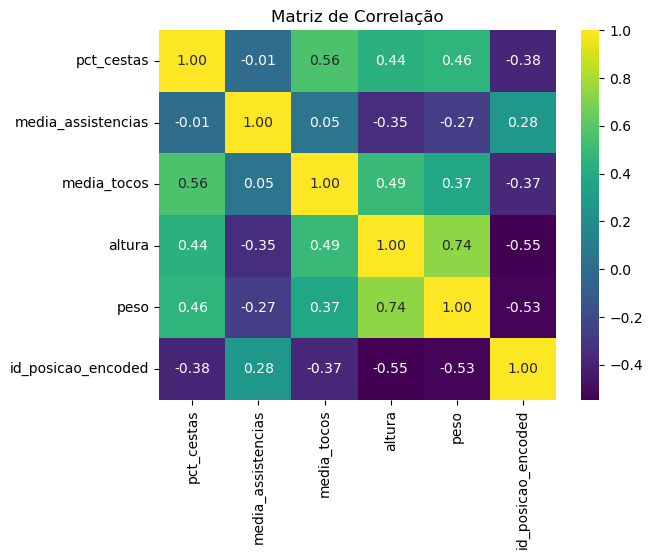

In [464]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = nba_clf_.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis")
plt.title("Matriz de Correlação")
plt.show()

#### Normalizacao

In [1]:
from sklearn.preprocessing import normalize, Normalizer
X = nba_clf_.drop('id_posicao_encoded', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = Normalizer(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

NameError: name 'nba_clf_' is not defined

#### KNeighbors KNearest - Ajustando o epsilon do DBSCAN

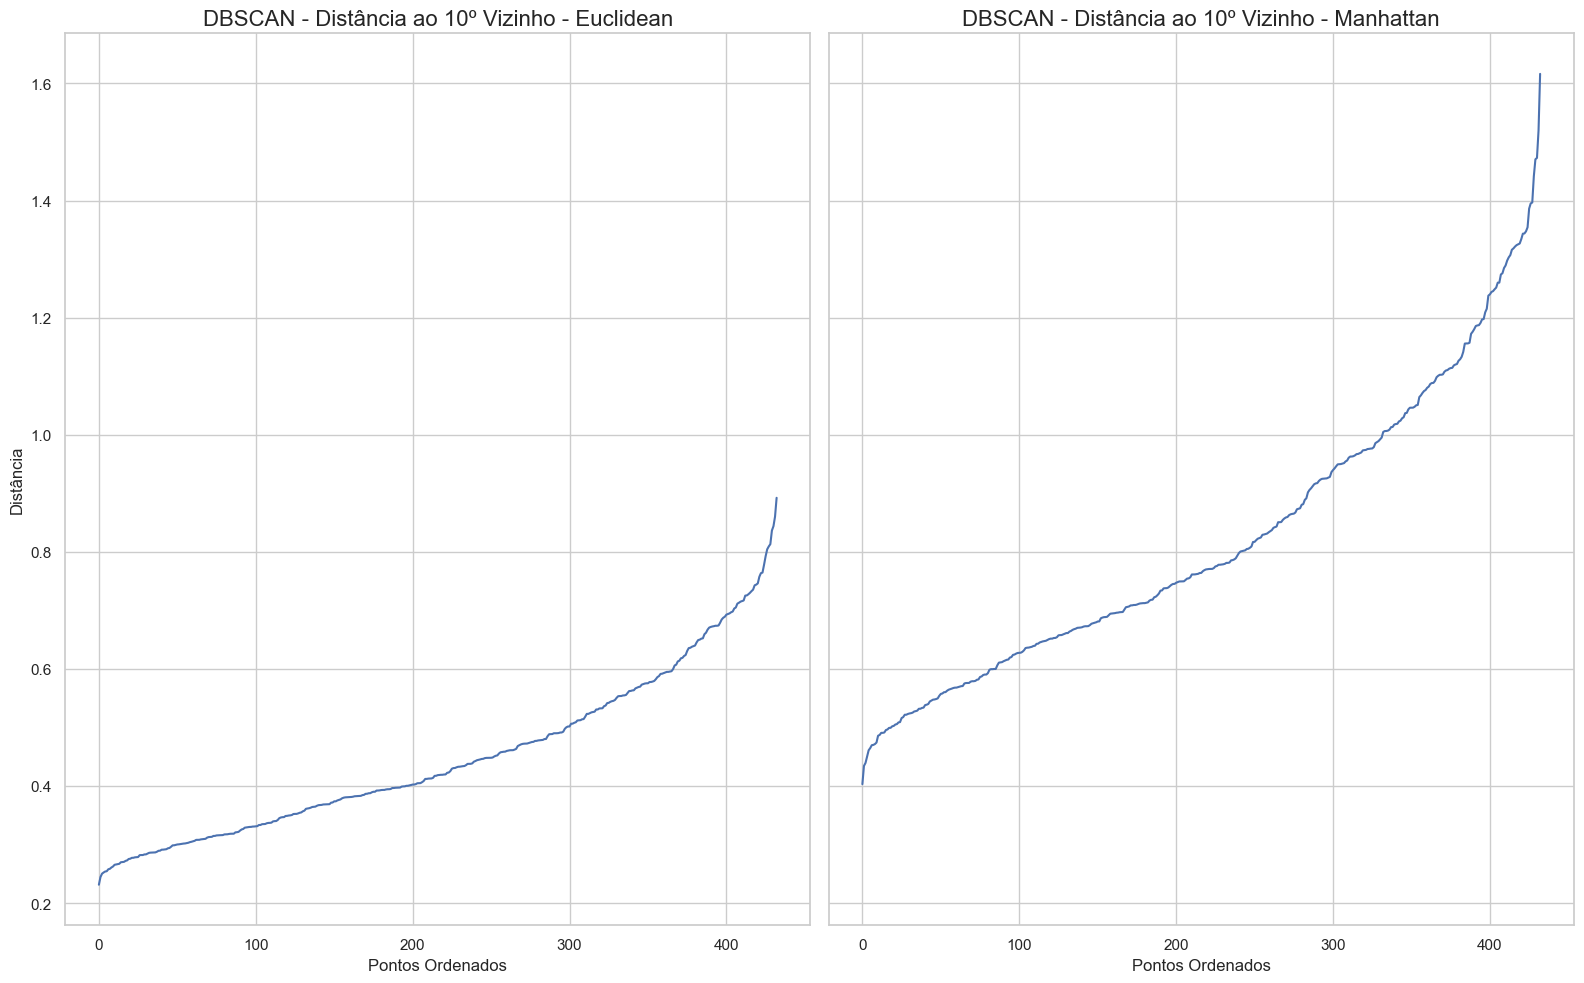

Euclidean:
DBSCAN - Distância EPS calculada pelo Percentil 95: 0.7161999070388004
DBSCAN - Distância EPS calculada pela Média: 0.44983487623489715

Manhattan:
DBSCAN - Distância EPS calculada pelo Percentil 95: 1.2924531337461844
DBSCAN - Distância EPS calculada pela Média: 0.8200694674686977


In [528]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Número de vizinhos
n_ = 10

# Calcular as distâncias com métrica Euclidean
neighbors_euclidean = NearestNeighbors(n_neighbors=n_, p=2).fit(X_normalized)  # p=2 para Euclidean
distances_euclidean, indices_euclidean = neighbors_euclidean.kneighbors(X_normalized)

# Calcular as distâncias com métrica Manhattan
neighbors_manhattan = NearestNeighbors(n_neighbors=n_, p=1).fit(X_normalized)  # p=1 para Manhattan
distances_manhattan, indices_manhattan = neighbors_manhattan.kneighbors(X_normalized)

# Ordenar as distâncias (para o n-ésimo vizinho)
distances_euclidean = np.sort(distances_euclidean[:, n_ - 1])
distances_manhattan = np.sort(distances_manhattan[:, n_ - 1])

# Plotar as duas métricas lado a lado
fig, ax = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

# Gráfico para Euclidean
ax[0].plot(distances_euclidean)
ax[0].set_title(f'DBSCAN - Distância ao {n_}º Vizinho - Euclidean', fontsize=16)
ax[0].set_xlabel('Pontos Ordenados')
ax[0].set_ylabel('Distância')
ax[0].grid(True)

# Gráfico para Manhattan
ax[1].plot(distances_manhattan)
ax[1].set_title(f'DBSCAN - Distância ao {n_}º Vizinho - Manhattan', fontsize=16)
ax[1].set_xlabel('Pontos Ordenados')
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Calcular os valores de eps (média e percentil 95)
eps_value95_euclidean = np.percentile(distances_euclidean, 95)
eps_media_euclidean = np.mean(distances_euclidean)

eps_value95_manhattan = np.percentile(distances_manhattan, 95)
eps_media_manhattan = np.mean(distances_manhattan)

# Exibir os resultados
print("Euclidean:")
print(f"DBSCAN - Distância EPS calculada pelo Percentil 95: {eps_value95_euclidean}")
print(f"DBSCAN - Distância EPS calculada pela Média: {eps_media_euclidean}\n")

print("Manhattan:")
print(f"DBSCAN - Distância EPS calculada pelo Percentil 95: {eps_value95_manhattan}")
print(f"DBSCAN - Distância EPS calculada pela Média: {eps_media_manhattan}")


#### Produzindo os min_samples dinâmicamente

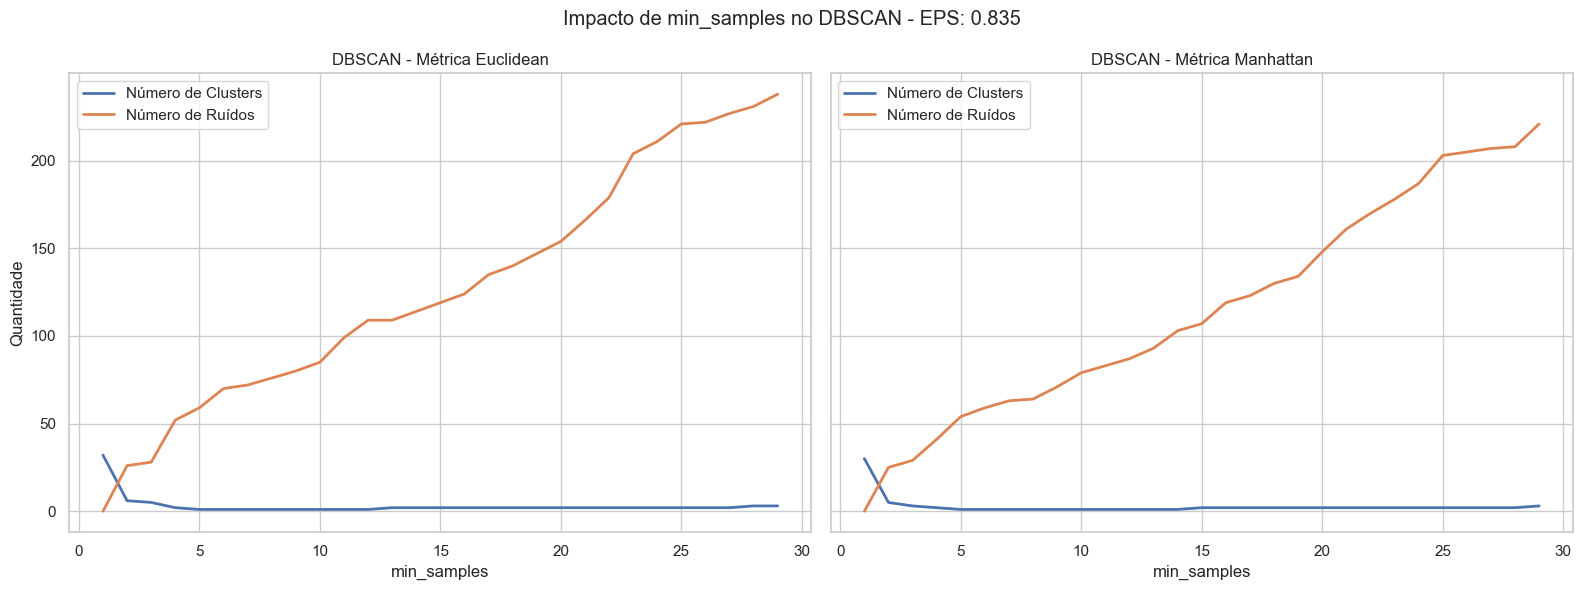

In [552]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN

# Dados para simulação (substitua X_normalized pelo seu dataset normalizado)
# X_normalized = ...

# Testar diferentes valores de min_samples
results_euclidean = []
results_manhattan = []

for min_samples in range(1, 30, 1):
    # DBSCAN com métrica Euclidean
    dbscan_euclidean = DBSCAN(eps=0.445, min_samples=min_samples, metric='euclidean').fit(X_normalized)
    labels_euclidean = dbscan_euclidean.labels_
    n_clusters_euclidean = len(set(labels_euclidean)) - (1 if -1 in labels_euclidean else 0)
    n_noise_euclidean = list(labels_euclidean).count(-1)
    results_euclidean.append((min_samples, n_clusters_euclidean, n_noise_euclidean, eps_value95_euclidean, eps_media_euclidean))

    # DBSCAN com métrica Manhattan
    dbscan_manhattan = DBSCAN(eps=0.835, min_samples=min_samples, metric='manhattan').fit(X_normalized)
    labels_manhattan = dbscan_manhattan.labels_
    n_clusters_manhattan = len(set(labels_manhattan)) - (1 if -1 in labels_manhattan else 0)
    n_noise_manhattan = list(labels_manhattan).count(-1)
    results_manhattan.append((min_samples, n_clusters_manhattan, n_noise_manhattan, eps_value95_manhattan, eps_media_manhattan))

# Converter os resultados para numpy arrays
results_euclidean = np.array(results_euclidean)
results_manhattan = np.array(results_manhattan)

# Configuração de Seaborn
sns.set(style="whitegrid")

# Criar dois gráficos lado a lado
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Gráfico para Euclidean
sns.lineplot(x=results_euclidean[:, 0], y=results_euclidean[:, 1], label='Número de Clusters', ax=ax[0], lw=2)
sns.lineplot(x=results_euclidean[:, 0], y=results_euclidean[:, 2], label='Número de Ruídos', ax=ax[0], lw=2)
ax[0].set_title("DBSCAN - Métrica Euclidean")
ax[0].set_xlabel("min_samples")
ax[0].set_ylabel("Quantidade")
ax[0].legend()
ax[0].grid(True)

# Gráfico para Manhattan
sns.lineplot(x=results_manhattan[:, 0], y=results_manhattan[:, 1], label='Número de Clusters', ax=ax[1], lw=2)
sns.lineplot(x=results_manhattan[:, 0], y=results_manhattan[:, 2], label='Número de Ruídos', ax=ax[1], lw=2)
ax[1].set_title("DBSCAN - Métrica Manhattan")
ax[1].set_xlabel("min_samples")
ax[1].legend()
ax[1].grid(True)

# Ajustar layout
plt.suptitle(f"Impacto de min_samples no DBSCAN - EPS: 0.835")
plt.tight_layout()
plt.show()


#### Testando os min_samples do teste acima de acordo com o GRAFICO 

In [553]:
# min_samples, n_clusters_manhattan, n_noise_manhattan, eps_value95_, eps_media_
print(f"Resultados da metrica euclidiana: \n {results_euclidean[:10]} \n")

Resultados da metrica euclidiana: 
 [[ 1.         32.          0.          0.71619991  0.44983488]
 [ 2.          6.         26.          0.71619991  0.44983488]
 [ 3.          5.         28.          0.71619991  0.44983488]
 [ 4.          2.         52.          0.71619991  0.44983488]
 [ 5.          1.         59.          0.71619991  0.44983488]
 [ 6.          1.         70.          0.71619991  0.44983488]
 [ 7.          1.         72.          0.71619991  0.44983488]
 [ 8.          1.         76.          0.71619991  0.44983488]
 [ 9.          1.         80.          0.71619991  0.44983488]
 [10.          1.         85.          0.71619991  0.44983488]] 



In [554]:
ms_= 2
dbscan_e = DBSCAN(eps=.45, min_samples=ms_, metric='euclidean').fit(X_normalized)
labels_e = dbscan.labels_
print('METRICAS EUCLIDIANAS')
print(set(labels_e))

# valores e os indices e os rótulos e os ruidos
print(f"TOTAL DE ELEMENTOS: {len(labels_e)}")
print(f"TOTAL DE COMPONENTES: {len(dbscan_e.components_)}")
print(f"TOTAL DO RUÍDO: {len(nba_clf[labels_e == -1])}, TAXA DE RUÍDO: {len(nba_clf[labels_e == -1])/len(labels_e):3F}%")

METRICAS EUCLIDIANAS
{0, 1, 2, 3, 4, -1}
TOTAL DE ELEMENTOS: 433
TOTAL DE COMPONENTES: 410
TOTAL DO RUÍDO: 25, TAXA DE RUÍDO: 0.057737%


In [539]:
print(f"Resultados da metrica manhattan: \n {results_manhattan[:10]} ")

Resultados da metrica manhattan: 
 [[ 1.         30.          0.          1.29245313  0.82006947]
 [ 2.          5.         25.          1.29245313  0.82006947]
 [ 3.          3.         29.          1.29245313  0.82006947]
 [ 4.          2.         41.          1.29245313  0.82006947]
 [ 5.          1.         54.          1.29245313  0.82006947]
 [ 6.          1.         59.          1.29245313  0.82006947]
 [ 7.          1.         63.          1.29245313  0.82006947]
 [ 8.          1.         64.          1.29245313  0.82006947]
 [ 9.          1.         71.          1.29245313  0.82006947]
 [10.          1.         79.          1.29245313  0.82006947]] 


In [555]:
ms_= 2
dbscan_m = DBSCAN(eps=.825, min_samples=ms_, metric='manhattan').fit(X_normalized)
labels_m = dbscan_m.labels_
print('METRICAS MANHATTAN')
print(set(labels_m))

# valores e os indices e os rótulos e os ruidos
print(f"TOTAL DE ELEMENTOS: {len(labels_m)}")
print(f"TOTAL DE COMPONENTES: {len(dbscan_m.components_)}")
print(f"TOTAL DO RUÍDO: {len(nba_clf[labels_m == -1])}, TAXA DE RUÍDO: {len(nba_clf[labels_m == -1])/len(labels_m):3F}%")

METRICAS MANHATTAN
{0, 1, 2, 3, 4, -1}
TOTAL DE ELEMENTOS: 433
TOTAL DE COMPONENTES: 407
TOTAL DO RUÍDO: 26, TAXA DE RUÍDO: 0.060046%


#### Append dos LABELS ao dataframe

In [507]:
clusters_df = nba_clf.assign(cluster=dbscan.labels_).sort_values("id_posicao")
clusters_df

,pct_cestas,media_assistencias,media_tocos,altura,peso,id_posicao,id_posicao_encoded,cluster
67,52.002998,3.231707,0.695122,2.08,117.93,C,0,0
55,59.310001,0.638889,0.722222,2.03,115.67,C,0,0
252,64.376999,1.661765,1.235294,2.06,110.22,C,0,0
380,44.217999,1.400000,0.680000,2.03,113.40,C,0,0
52,60.000000,0.130435,0.130435,2.24,131.54,C,0,0
...,...,...,...,...,...,...,...,...
246,44.848999,3.870130,0.259740,1.91,90.72,SG,6,0
251,47.923000,4.379310,0.379310,1.96,97.52,SG,6,0
255,48.499001,2.946667,0.320000,2.01,89.81,SG,6,-1
227,43.243000,0.594595,0.081081,2.01,91.63,SG,6,0


#### Clustering Plot

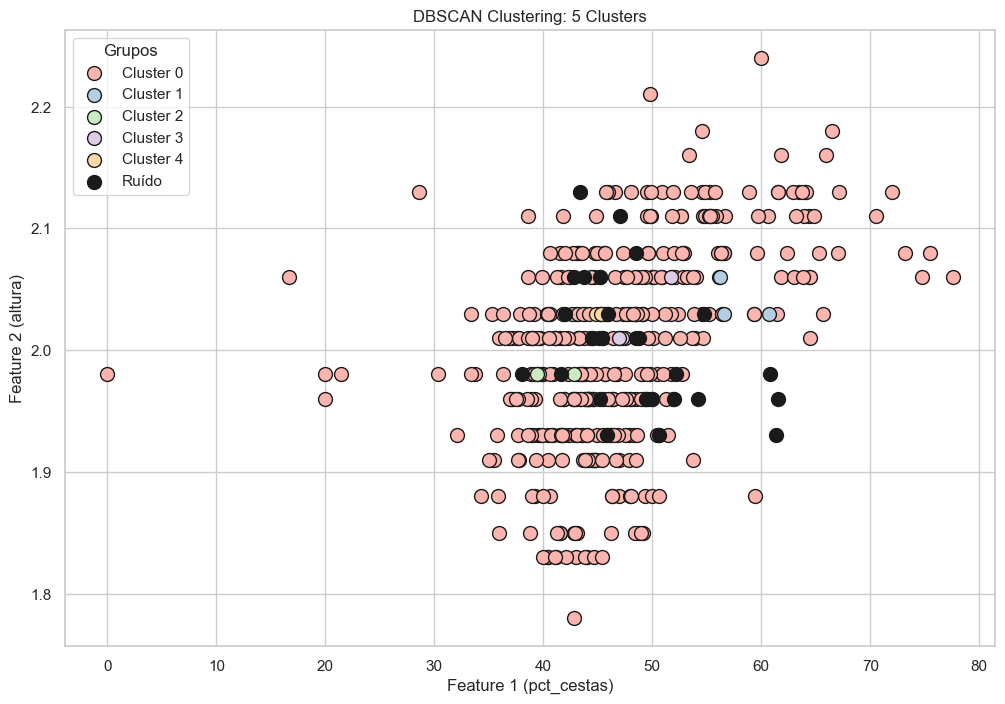

In [556]:
# Adicionar os rótulos ao DataFrame original
nba_clf['cluster'] = labels_m

# Obter os rótulos únicos e criar um mapeamento de cores
unique_labels = set(labels)
colours = {label: plt.cm.Pastel1(i) for i, label in enumerate(unique_labels)}
colours[-1] = 'k'  # Ruídos em preto

# Criar o gráfico
plt.figure(figsize=(12, 8))
for label, color in colours.items():
    # Filtrar os pontos do cluster atual no DataFrame
    cluster_points = nba_clf[nba_clf['cluster'] == label]

    # Plotar os pontos do cluster
    plt.scatter(
        cluster_points['pct_cestas'], cluster_points['altura'],
        c=[color], label=f"Cluster {label}" if label != -1 else "Ruído",
        edgecolor='k', s=100
    )

# Adicionar título, eixos e legenda
plt.title(f"DBSCAN Clustering: {len(unique_labels) - (1 if -1 in labels else 0)} Clusters")
plt.xlabel("Feature 1 (pct_cestas)")
plt.ylabel("Feature 2 (altura)")
plt.legend(loc="best", title="Grupos")
plt.grid(True)
plt.show()


### Learning Curve - Simulate

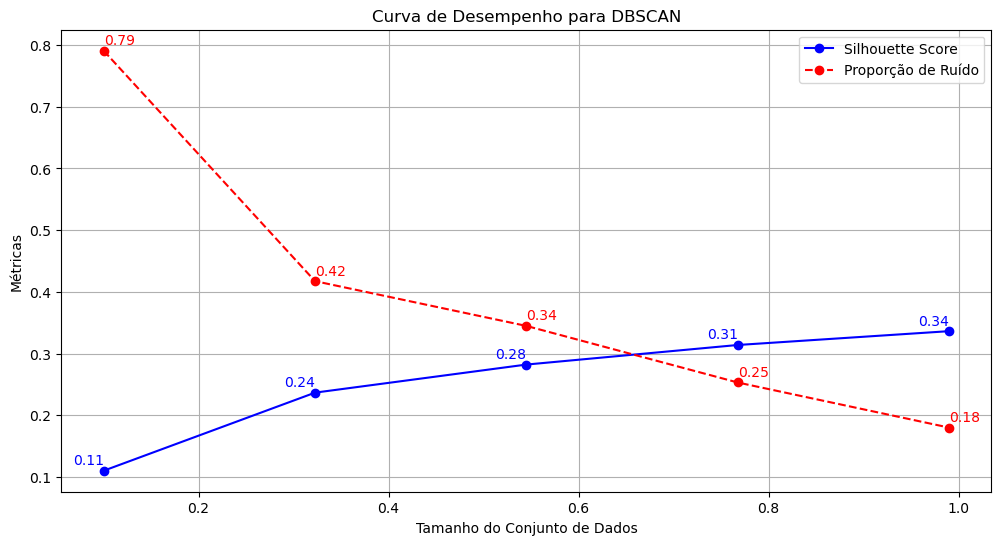

In [339]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Simulação de dados ou use o seu conjunto
# X = ...

# Definir tamanhos crescentes do conjunto de treinamento
train_sizes = np.linspace(0.1, 0.99, 5)

# Configuração dos parâmetros do DBSCAN
eps = np.mean(distances)  # Substitua pela média real das distâncias
min_samples = ms_

silhouette_scores = []  # Para armazenar o silhouette score
noise_ratios = []  # Para armazenar a proporção de pontos classificados como ruído

# Iterar por diferentes tamanhos do conjunto de treinamento
for train_size in train_sizes:
    X_train, _, _, _ = train_test_split(X_normalized, X, train_size=train_size, random_state=42)

    # Ajustar o modelo DBSCAN
    dbscan = DBSCAN(eps=eps_media, min_samples=min_samples)
    labels = dbscan.fit_predict(X_train)
    
    # Calcular silhouette score, ignorando ruídos (-1)
    if len(set(labels)) > 1:  # silhouette_score exige ao menos 2 clusters
        silhouette = silhouette_score(X_train, labels, metric='manhattan')
        silhouette_scores.append(silhouette)
    else:
        silhouette_scores.append(0)  # Sem clusters válidos

    # Calcular a proporção de ruído
    noise_ratio = np.sum(labels == -1) / len(labels)
    noise_ratios.append(noise_ratio)

# Plotar a curva
plt.figure(figsize=(12, 6))

# Curva de Silhouette Scores
plt.plot(train_sizes, silhouette_scores, 'o-', label='Silhouette Score', color='blue')

# Adicionar rótulos aos pontos do Silhouette Score
for i, score in enumerate(silhouette_scores):
    plt.text(train_sizes[i], silhouette_scores[i] + 0.01, f"{score:.2f}", color='blue', fontsize=10, ha='right')

# Curva da Proporção de Ruído
plt.plot(train_sizes, noise_ratios, 'o-', label='Proporção de Ruído', color='red', ls="--")

# Adicionar rótulos aos pontos da Proporção de Ruído
for i, noise in enumerate(noise_ratios):
    plt.text(train_sizes[i], noise_ratios[i] + 0.01, f"{noise:.2f}", color='red', fontsize=10, ha='left')

# Configuração do Gráfico
plt.xlabel('Tamanho do Conjunto de Dados')
plt.ylabel('Métricas')
plt.title('Curva de Desempenho para DBSCAN')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### GRIDSEARCH

In [388]:
nba_clf_.columns

Index(['pct_cestas', 'altura', 'peso', 'id_posicao_encoded'], dtype='object')

In [389]:
# Separar X e y
X = nba_clf_.drop(columns=['id_posicao_encoded'])
y = nba_clf_['id_posicao_encoded']

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
X_normalized = StandardScaler().fit_transform(X)

In [390]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [391]:
# Definir os pipelines
# Criar o pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalizar os dados
    ('cluster', DBSCAN())          # DBSCAN como etapa final
])

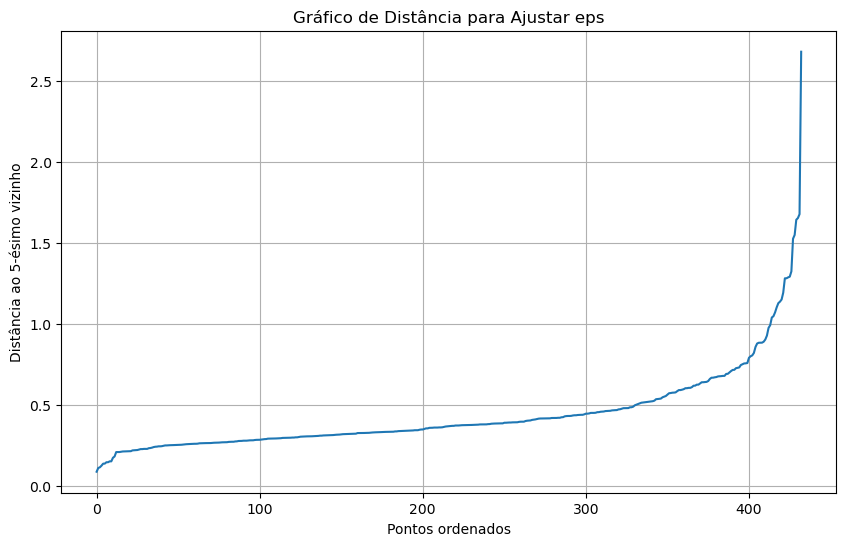

In [398]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Calcular as distâncias para o k-ésimo vizinho (k = min_samples)
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples).fit(X_normalized)
distances, indices = neighbors.kneighbors(X_normalized)

# Ordenar as distâncias (k-distance plot)
sorted_distances = np.sort(distances[:, min_samples - 1])

# Plotar o gráfico de distância
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.title("Gráfico de Distância para Ajustar eps")
plt.xlabel("Pontos ordenados")
plt.ylabel(f"Distância ao {min_samples}-ésimo vizinho")
plt.grid(True)
plt.show()


In [399]:
np.linspace(0.01, 1.0, 10)

array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])

In [392]:
param_grid = {
    'cluster__eps': np.linspace(0.01, 1.0, 10),  # Ajustar o intervalo de eps
    'cluster__min_samples': [2, 3, 5, 10],      # Valores mais comuns para min_samples
    'cluster__metric': ['euclidean', 'manhattan'],  # Métricas de distância
    'cluster__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algoritmos de vizinhança
}

In [393]:
from sklearn.metrics import make_scorer, silhouette_score

def silhouette_scorer(X, labels):
    # Verificar se há ao menos 2 clusters (sem contar ruídos)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters < 2:
        return np.nan  # Retorna NaN se não houver clusters suficientes
    return silhouette_score(X, labels)

scorer = make_scorer(silhouette_scorer, greater_is_better=True, needs_proba=False)

from sklearn.metrics import calinski_harabasz_score

def calinski_harabasz_scorer(X, labels):
    if len(set(labels)) < 2:  # Verificar se há ao menos 2 clusters
        return np.nan
    return calinski_harabasz_score(X, labels)

scorer_ch = make_scorer(calinski_harabasz_scorer, greater_is_better=True)

from sklearn.metrics import davies_bouldin_score

def davies_bouldin_scorer(X, labels):
    if len(set(labels)) < 2:  # Verificar se há ao menos 2 clusters
        return np.nan
    return -davies_bouldin_score(X, labels)  # Menor é melhor, então invertemos o sinal

scorer_db = make_scorer(davies_bouldin_scorer, greater_is_better=True)


In [396]:
# Configurar o GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scorer_db,  # Ajustar se necessário (exemplo: silhouette_score)
    cv=kf,  # Número de folds para validação cruzada
    verbose=2
)

In [397]:
# Executar o GridSearch
grid_search.fit(X_normalized)

# Melhor combinação de hiperparâmetros
if not np.isnan(grid_search.best_score_):
    print("\nMelhores parâmetros encontrados:", grid_search.best_params_)
    print("\nMelhor pontuação:", grid_search.best_score_)
else:
    print("\nNenhum conjunto válido de parâmetros encontrado.")

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END cluster__algorithm=auto, cluster__eps=0.01, cluster__metric=euclidean, cluster__min_samples=2; total time=   0.0s
[CV] END cluster__algorithm=auto, cluster__eps=0.01, cluster__metric=euclidean, cluster__min_samples=2; total time=   0.0s
[CV] END cluster__algorithm=auto, cluster__eps=0.01, cluster__metric=euclidean, cluster__min_samples=2; total time=   0.0s
[CV] END cluster__algorithm=auto, cluster__eps=0.01, cluster__metric=euclidean, cluster__min_samples=2; total time=   0.0s
[CV] END cluster__algorithm=auto, cluster__eps=0.01, cluster__metric=euclidean, cluster__min_samples=2; total time=   0.0s
[CV] END cluster__algorithm=auto, cluster__eps=0.01, cluster__metric=euclidean, cluster__min_samples=3; total time=   0.0s
[CV] END cluster__algorithm=auto, cluster__eps=0.01, cluster__metric=euclidean, cluster__min_samples=3; total time=   0.0s
[CV] END cluster__algorithm=auto, cluster__eps=0.01, cluster__metric=euclid

In [373]:
grid_search

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('cluster', DBSCAN())]),
             param_grid={'cluster__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                                'brute'],
                         'cluster__eps': array([0.07747331, 0.11734599, 0.15721867, 0.19709135, 0.23696402,
       0.2768367 , 0.31670938, 0.35658206, 0.39645474, 0.43632742,
       0.47620009, 0.51607277, 0.55594545, 0.59581813, 0.63569081]),
                         'cluster__metric': ['euclidean', 'manhattan'],
                         'cluster__min_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                  10]},
             scoring=make_scorer(silhouette_score, response_method='predict'),
             verbose=2)

In [375]:
grid_search?

Type:        GridSearchCV
String form:
GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
           estimator=Pipeline <...>         scoring=make_scorer(silhouette_score, response_method='predict'),
           verbose=2)
File:        c:\users\thiagobluhm\anaconda3\lib\site-packages\sklearn\model_selection\_search.py
Docstring:  
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator n

In [378]:
grid_search.cv_results_

{'mean_fit_time': array([0.00459609, 0.00279412, 0.00279946, ..., 0.00679893, 0.00549998,
        0.00559897]),
 'std_fit_time': array([0.00204869, 0.00040107, 0.00040338, ..., 0.00172244, 0.00100272,
        0.00080423]),
 'mean_score_time': array([0.00020003, 0.00039992, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 'std_score_time': array([0.00040007, 0.00048983, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 'param_cluster__algorithm': masked_array(data=['auto', 'auto', 'auto', ..., 'brute', 'brute', 'brute'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_cluster__eps': masked_array(data=[0.07747330978333376, 0.07747330978333376,
                    0.07747330978333376, ..., 0.6356908084742117,
                    0.6356908084742117, 0.6356908084742117],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=obj

In [ ]:
"""
{'f1_weighted', 'precision_weighted', 'jaccard_weighted', 'f1_macro', 'max_error', 'adjusted_mutual_info_score', 'mutual_info_score', 
'precision_micro', 'recall_macro', 'roc_auc_ovo', 'neg_root_mean_squared_error', 'adjusted_rand_score', 'jaccard_macro', 'f1_micro', 
'balanced_accuracy', 'accuracy', 'explained_variance', 'homogeneity_score', 'jaccard_samples', 'roc_auc', 'recall_samples', 
'neg_mean_squared_log_error', 'precision_samples', 'v_measure_score', 'neg_log_loss', 'recall_weighted', 'neg_brier_score', 
'rand_score', 'roc_auc_ovo_weighted', 'neg_root_mean_squared_log_error', 'completeness_score', 'top_k_accuracy', 'roc_auc_ovr_weighted', 
'average_precision', 'fowlkes_mallows_score', 'jaccard', 'neg_mean_absolute_percentage_error', 'positive_likelihood_ratio', 'recall', 
'neg_mean_poisson_deviance', 'recall_micro', 'neg_mean_squared_error', 'neg_negative_likelihood_ratio', 'precision_macro', 'f1', 
'jaccard_micro', 'r2', 'matthews_corrcoef', 'f1_samples', 
'normalized_mutual_info_score', 'neg_mean_absolute_error', 'roc_auc_ovr', 'precision', 'neg_mean_gamma_deviance', 
'neg_median_absolute_error'}

"""